                                #Visualizing and Forecasting of Stocks (NSE)(WIPRO)

In [5]:
!pip install numpy pandas notebook nsepy
#*** NSEpy is a library to extract historical and realtime data from NSE’s website. This Library aims to keep the API very simple. ***

In [4]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 68.2 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62567 sha256=abe3bf663eb9a02034dfe1326c

In [6]:
!pip install investpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 50.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 15.5 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481565 sha256=34cd549f5e2c76a25513b363fdd2a8a8dd427367487eb992a860dc99c24bb955
  Stored in directory: /root/.cache/pip/wheels/db/f4/ae/980b93b0257620bc8e4afc98a854a7a746a33eb8335fd07906
Successfully built investpy


In [7]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.2 MB/s eta 0:00:00


In [8]:
%matplotlib inline
import pandas as pd#library to handle dataframe
import numpy as np#library for scientific computing
import matplotlib.pyplot as plt#library for plots

import requests#library for request from URLs
from bs4 import BeautifulSoup as bs#library for scraping
import dtale as dt#visualization library
from dateutil.parser import parse
import investpy#library for scraping
from nsepy import get_history#library for scraping
from sqlalchemy import *#library for SQL
import warnings#library for skip warning
from datetime import date#library for handle DateTime format
from dateutil.relativedelta import *#library for handle DateTime format
import seaborn as sns
from datetime import timedelta#library for handle DateTime format
from statistics import stdev#library for find standard deviation
import scipy.stats as stats#library for statistical functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf#library for ACF & PACF plots
from statsmodels.tsa.seasonal import seasonal_decompose#library for seasonal plot
from pmdarima import auto_arima#library for finding p, q, d
from statsmodels.tsa.stattools import adfuller#library for finding d
from statsmodels.tsa.arima_model import ARIMA#library for ARIMA model
from sklearn.metrics import mean_squared_error, mean_absolute_error#library for finding error in model
import pickle#library for Pickle model into pkl file


In [9]:
import yfinance as yf

# Download data for WIPRO
wipro = yf.download('WIPRO.NS', start='2015-01-01', end=date.today())

# Display the first few rows
print(wipro.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  207.206299  207.900055  206.437546  207.150055  194.484207   
2015-01-02  207.525055  210.093796  207.375046  208.987549  196.209381   
2015-01-05  208.893799  211.875046  208.312546  209.362549  196.561432   
2015-01-06  208.125046  208.650055  203.287552  204.468796  191.966904   
2015-01-07  203.700043  204.375046  201.881302  202.912552  190.505798   

             Volume  
Date                 
2015-01-01   541274  
2015-01-02  2099476  
2015-01-05  1919300  
2015-01-06  6198347  
2015-01-07  4152790  


In [10]:
wipro.to_csv('wipro.csv')

<Axes: xlabel='Date'>

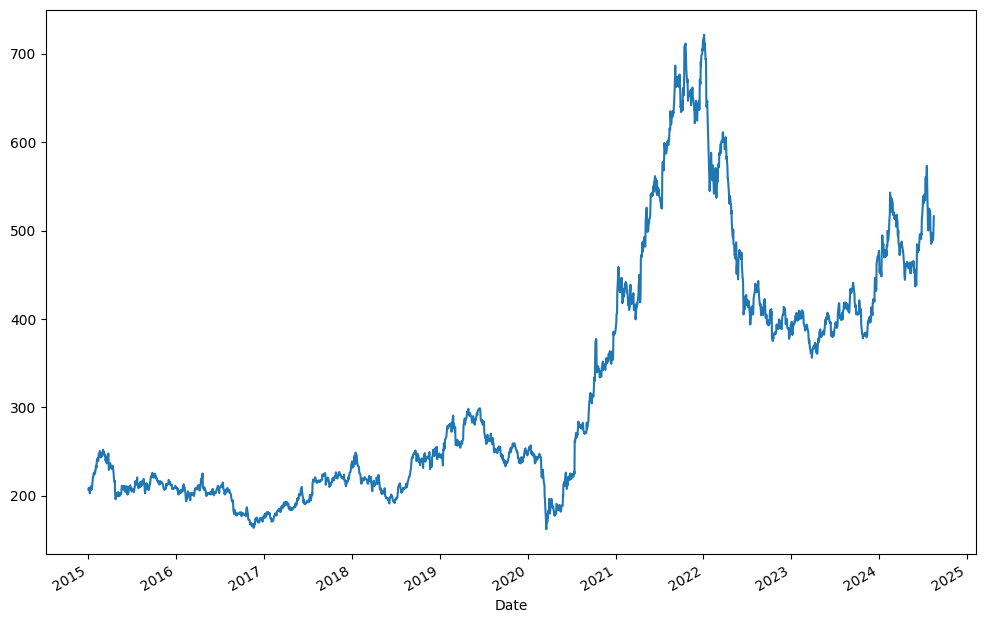

In [11]:
wipro['Close'].plot(figsize=(12,8))


In [12]:
wipro.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,207.206299,207.900055,206.437546,207.150055,194.484207,541274
2015-01-02,207.525055,210.093796,207.375046,208.987549,196.209381,2099476
2015-01-05,208.893799,211.875046,208.312546,209.362549,196.561432,1919300
2015-01-06,208.125046,208.650055,203.287552,204.468796,191.966904,6198347
2015-01-07,203.700043,204.375046,201.881302,202.912552,190.505798,4152790


# To check dataset is stationary or seasonal, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals

<Figure size 640x480 with 0 Axes>

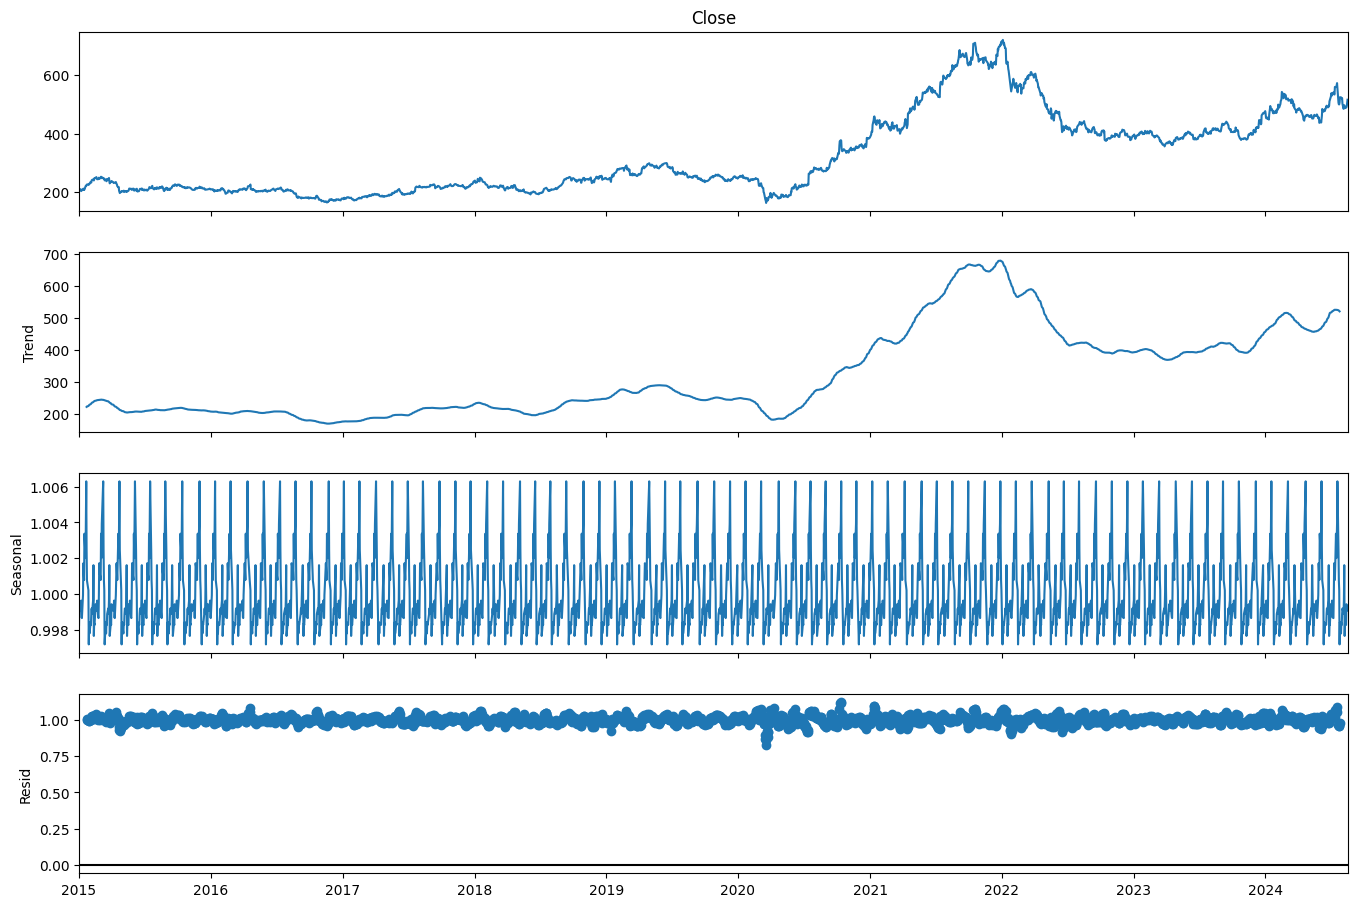

In [14]:
# using ARIMA(visualization) for Time Series Forecasting
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(wipro["Close"],
                            model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

#* 1st fig. displaying original data
#*2nd fig displays Trend values(it will consider averages of prices and calculate seasonality)
#* data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting.
#Stationary time series is one whose properties do not depend on the time
#Properties
#*Mean -- constant mean
#*Variance -- variance should be constant with time
#*Auto correlation -- correlation b/w to points depends on distance b/w 2points (lags b/w 2 points)
#Checking for stationary with Dickey-fuller Test
#*low Pvalue(lower than 0.05) implies series is stationary
#*High PValue(greater than 0.05)implies not stationary

In [19]:
!pip install statsmodels

In [20]:
#from statsmodels.tsa.statstools import adfuller
from statsmodels.tsa.stattools import adfuller#library for finding d

In [21]:

series = wipro['Close'].values
series

array([207.15005493, 208.98754883, 209.36254883, ..., 490.5       ,
       495.1499939 , 516.25      ])

In [22]:
adftest=adfuller(wipro['Close'])

In [23]:
print('Pvalue of adfuller test is:', adftest[1])

Pvalue of adfuller test is: 0.8048778529751595


In [24]:
# ADF Test
result = adfuller(series, autolag='AIC')
#Extracting the values from the results:

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")


ADF Statistic: -0.847152
p-value: 0.804878
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-Stationary


In [25]:
from numpy import sqrt,mean,log,diff
series1=wipro['Close'].diff()

<Axes: xlabel='Date'>

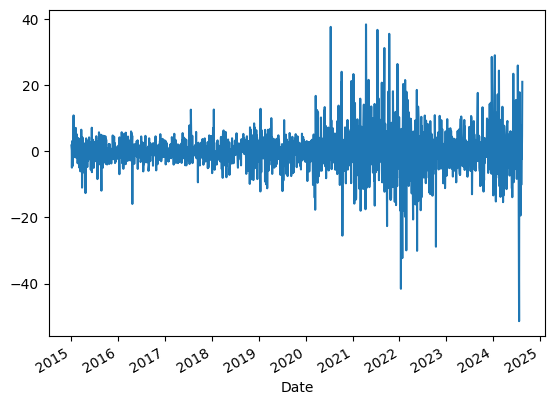

In [26]:
series1.plot()

In [27]:
adf1=adfuller(series1.dropna())
print("Pvalue of ADF test is:",adf1[1])

Pvalue of ADF test is: 9.657720939918057e-19


In [28]:
series1.isna().sum

<bound method Series.sum of Date
2015-01-01     True
2015-01-02    False
2015-01-05    False
2015-01-06    False
2015-01-07    False
              ...  
2024-08-09    False
2024-08-12    False
2024-08-13    False
2024-08-14    False
2024-08-16    False
Name: Close, Length: 2374, dtype: bool>

In [29]:
wipro.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-09,495.350006,496.450012,489.649994,491.299988,491.299988,3032974
2024-08-12,491.549988,494.000000,487.399994,489.049988,489.049988,3669234
2024-08-13,489.049988,492.700012,487.149994,490.500000,490.500000,3144709
2024-08-14,493.000000,496.850006,490.450012,495.149994,495.149994,5560878
2024-08-16,501.000000,517.450012,497.950012,516.250000,516.250000,12965570


In [30]:
wipro = wipro.reset_index()
wipro.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,207.206299,207.900055,206.437546,207.150055,194.484207,541274
1,2015-01-02,207.525055,210.093796,207.375046,208.987549,196.209381,2099476
2,2015-01-05,208.893799,211.875046,208.312546,209.362549,196.561432,1919300


In [31]:
wipro.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [32]:
wipro.sort_values(
  by="Date",
  ascending=False
 )

,Date,Open,High,Low,Close,Adj Close,Volume
2373,2024-08-16,501.000000,517.450012,497.950012,516.250000,516.250000,12965570
2372,2024-08-14,493.000000,496.850006,490.450012,495.149994,495.149994,5560878
2371,2024-08-13,489.049988,492.700012,487.149994,490.500000,490.500000,3144709
2370,2024-08-12,491.549988,494.000000,487.399994,489.049988,489.049988,3669234
2369,2024-08-09,495.350006,496.450012,489.649994,491.299988,491.299988,3032974
...,...,...,...,...,...,...,...
4,2015-01-07,203.700043,204.375046,201.881302,202.912552,190.505798,4152790
3,2015-01-06,208.125046,208.650055,203.287552,204.468796,191.966904,6198347
2,2015-01-05,208.893799,211.875046,208.312546,209.362549,196.561432,1919300
1,2015-01-02,207.525055,210.093796,207.375046,208.987549,196.209381,2099476


In [33]:
#Duplicate Values
print("There are", wipro.duplicated().sum(),'duplicated values in dataset')

There are 0 duplicated values in dataset


In [34]:
#Null values

wipro.isna().sum

<bound method DataFrame.sum of        Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
2369  False  False  False  False  False      False   False
2370  False  False  False  False  False      False   False
2371  False  False  False  False  False      False   False
2372  False  False  False  False  False      False   False
2373  False  False  False  False  False      False   False

[2374 rows x 7 columns]>

In [35]:
#exclude remaining all columns expect date and column
wipro1 = wipro[['Date','Close']]
wipro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2374 non-null   datetime64[ns]
 1   Close   2374 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 37.2 KB


In [36]:
# Adding Saturday and sunday dates

In [37]:
wipro_data = pd.date_range(start=wipro1.Date.min(), end=wipro1.Date.max())

In [38]:
wipro_data = pd.DataFrame(wipro_data)


In [39]:
wipro_data['Price'] = ""

In [40]:
wipro_data.head(2)

,0,Price
0,2015-01-01,
1,2015-01-02,


In [41]:
for i in range(len(wipro1['Date'])):
    for j in range(len(wipro_data[0])):
        if wipro1['Date'][i] == wipro_data[0][j]:
            wipro_data['Price'][j] = wipro1['Close'][i]

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-3c843bf952e5>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-3c843bf952e5>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-3c843bf952e5>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipyt

In [42]:
wipro_data.head(10)

,0,Price
0,2015-01-01,207.150055
1,2015-01-02,208.987549
2,2015-01-03,
3,2015-01-04,
4,2015-01-05,209.362549
5,2015-01-06,204.468796
6,2015-01-07,202.912552
7,2015-01-08,204.375046
8,2015-01-09,207.562546
9,2015-01-10,


In [43]:
#replacing nan in empty places
wipro_data['Price'] = wipro_data['Price'].replace('',np.nan)
wipro_data.head(5)

,0,Price
0,2015-01-01,207.150055
1,2015-01-02,208.987549
2,2015-01-03,NaN
3,2015-01-04,NaN
4,2015-01-05,209.362549


In [44]:
#adding previous day prices to sat and sunday
wipro_data['Price'] = wipro_data['Price'].ffill()
wipro_data.head(5)

,0,Price
0,2015-01-01,207.150055
1,2015-01-02,208.987549
2,2015-01-03,208.987549
3,2015-01-04,208.987549
4,2015-01-05,209.362549


In [45]:
#Null values
wipro_data.isna().sum()

,0
0,0
Price,0


In [46]:
wipro_data.columns=['Date','Price']
wipro_data

,Date,Price
0,2015-01-01,207.150055
1,2015-01-02,208.987549
2,2015-01-03,208.987549
3,2015-01-04,208.987549
4,2015-01-05,209.362549
...,...,...
3511,2024-08-12,489.049988
3512,2024-08-13,490.500000
3513,2024-08-14,495.149994
3514,2024-08-15,495.149994


In [47]:
#loading data in browser using dtale library
d=dt.show(wipro_data)
d.open_browser()

In [48]:
#downloading data in csv format
wipro_data.columns="Date","Price"
wipro_data.to_csv("sbin_finaldata.csv")

In [49]:
wipro_data.shape

(3516, 2)

In [50]:
wipro_data.columns

Index(['Date', 'Price'], dtype='object')

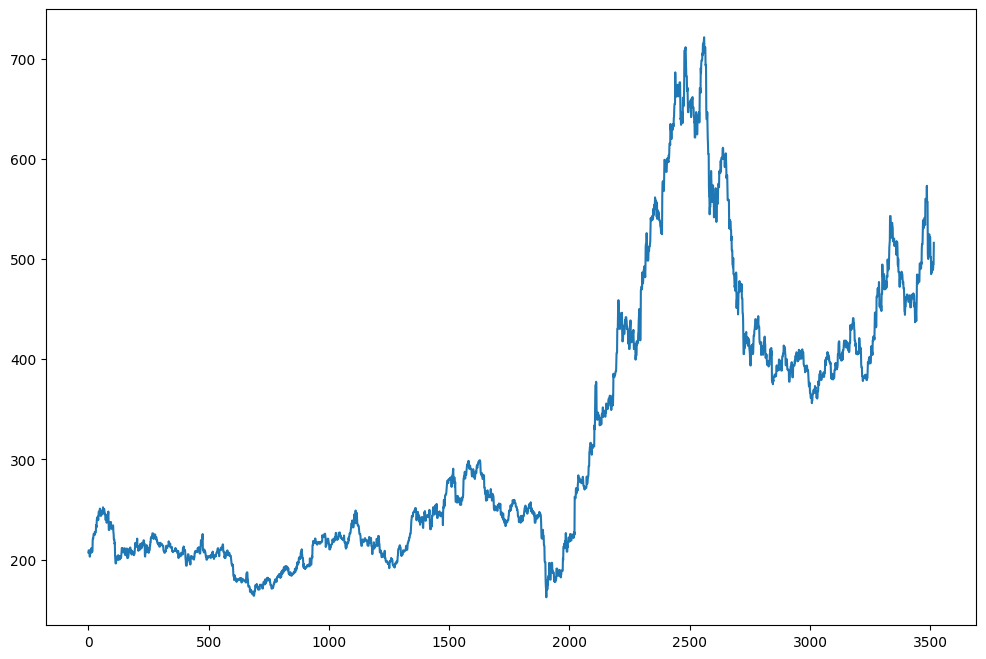

In [51]:
wipro_data['Price'].plot(figsize=(12,8))
plt.show()

In [52]:
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0b9155d5553b3baa0b5fcb65a3c7d3fa824f89f6ae6f317e79352636ffc49d52
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [53]:
!pip cache purge

Files removed: 3164


In [54]:
!pip install pydantic-settings

In [55]:
!pip install ydata-profiling

In [56]:
#visualization
#!pip install dtale
#pandas_profiling.version.__version__
#import pandas_profiling
import ydata_profiling
from ydata_profiling import ProfileReport


In [57]:
profi = ProfileReport(wipro_data)
profi


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
wipro_data.describe()

,Date,Price
count,3516,3516.000000
mean,2019-10-24 12:00:00,321.781480
min,2015-01-01 00:00:00,162.350006
25%,2017-05-28 18:00:00,210.984432
50%,2019-10-24 12:00:00,252.000000
75%,2022-03-21 06:00:00,412.725006
max,2024-08-16 00:00:00,721.500000
std,NaN,137.281864


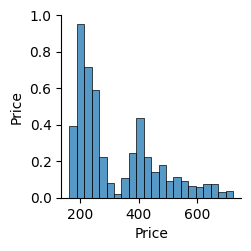

In [59]:
# pairplot
sns.pairplot(wipro_data)
# to show
plt.show()

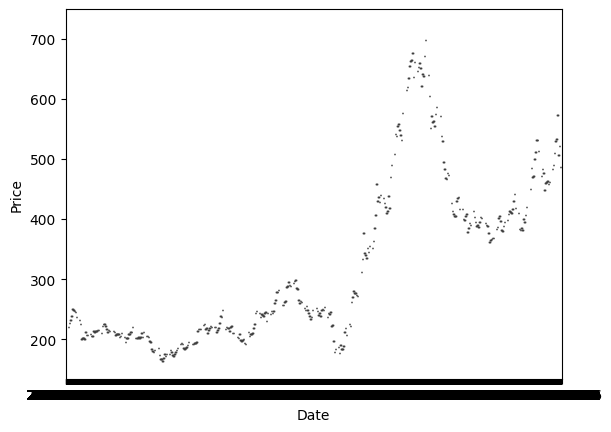

In [60]:
#box plot
sns.boxplot(x='Date',y='Price',data=wipro_data)
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

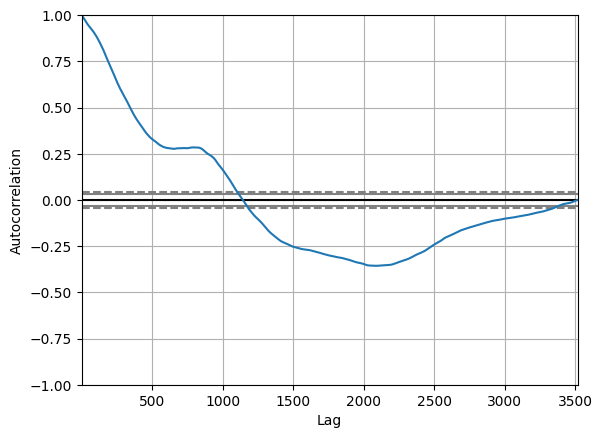

In [61]:
pd.plotting.autocorrelation_plot(wipro_data["Price"])

In [62]:
#In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5.

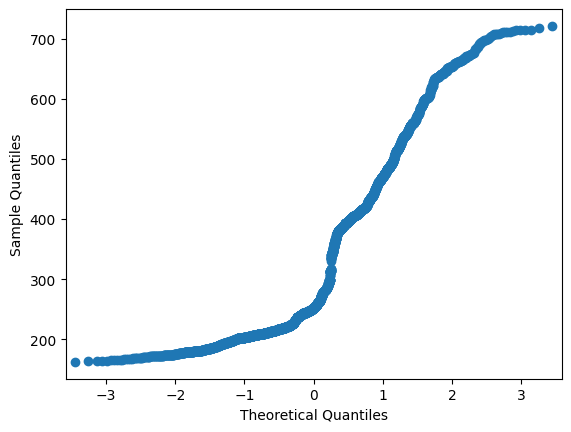

In [63]:
from statsmodels.graphics.gofplots import qqplot

qqplot(wipro_data['Price'])
plt.show()

In [64]:
wipro_data.shape

(3516, 2)

In [65]:
import os
os.getcwd()

'/content'

In [66]:
#highest price
wipro_data['Price'].nlargest(n=10)


,Price
2560,721.500000
2559,718.700012
2556,715.349976
2557,715.349976
2558,715.349976
2555,714.099976
2561,713.500000
2483,711.549988
2563,711.500000
2564,711.500000


In [67]:
#lowest price
wipro_data['Price'].nsmallest(n=10)

,Price
1904,162.350006
687,163.931290
688,163.931290
689,163.931290
686,164.400040
690,165.675034
680,165.881287
681,165.881287
682,165.881287
683,165.881287


<Axes: ylabel='Frequency'>

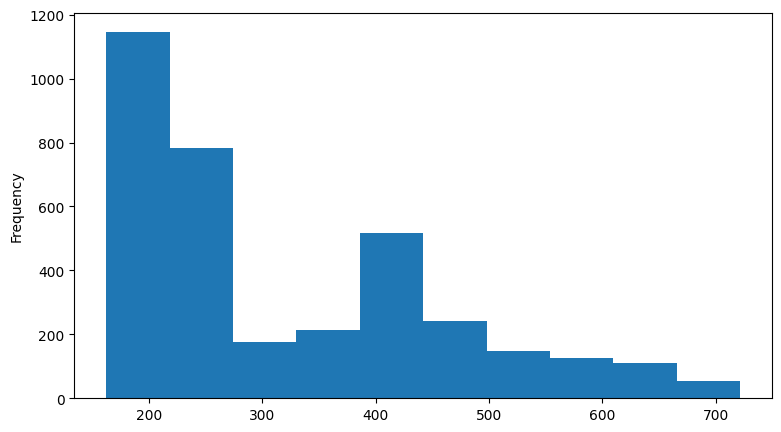

In [68]:
plt.figure(figsize = (9, 5))
wipro_data['Price'].plot(kind ="hist")


<Axes: >

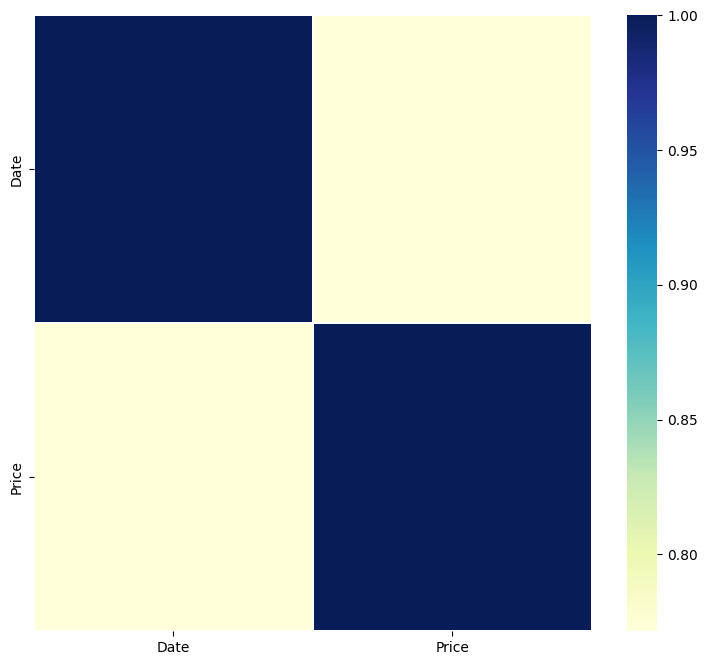

In [69]:
corrmat = wipro_data.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


In [70]:
########################ARIMA{Autoregressive Integrated Moving Average}###################################
#*Time Series Forecasting means analyzing and modeling time-series data to make future decisions.
#*Arima is one of the statistical method for forecasting Time series data


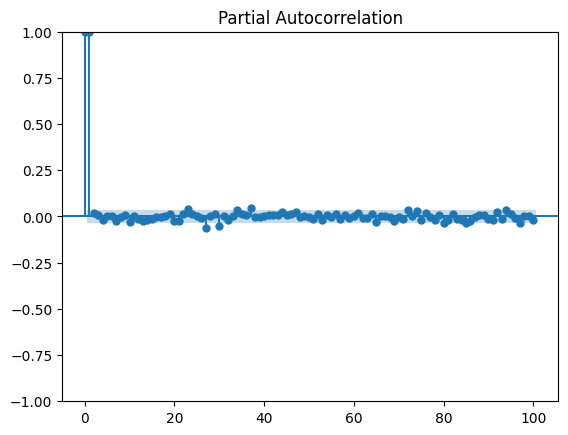

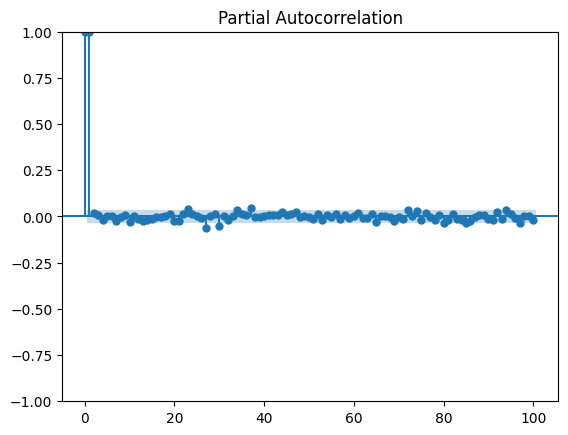

In [71]:
#Arima
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(wipro_data["Price"], lags = 100)

In [72]:
#*ARIMA models have three parameters like ARIMA(p, d, q).
#*p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
#*d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
#*q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

In [73]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(wipro_data["Price"], order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 3516
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -10481.089
Date:                Sun, 18 Aug 2024   AIC                          20978.177
Time:                        20:20:58   BIC                          21027.495
Sample:                             0   HQIC                         20995.774
                               - 3516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4413      0.027    -54.043      0.000      -1.494      -1.389
ar.L2         -0.9054      0.033    -27.118      0.000      -0.971      -0.840
ar.L3          0.0478      0.029      1.628      0.1

In [74]:
predictions = fitted.predict()
print(predictions)

0         0.000000
1       207.150171
2       209.032464
3       208.961676
4       209.073819
           ...    
3511    491.481869
3512    488.750718
3513    490.872519
3514    494.946200
3515    495.165810
Name: predicted_mean, Length: 3516, dtype: float64


In [75]:
#SARIMA stands for Seasonal-ARIMA and it includes seasonality contribution to the forecast. The importance of seasonality is quite evident and ARIMA fails to encapsulate that information implicitly.

In [76]:
#sarima
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(wipro_data['Price'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 3516
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood              -10481.351
Date:                            Sun, 18 Aug 2024   AIC                          20992.702
Time:                                    20:30:35   BIC                          21085.123
Sample:                                         0   HQIC                         21025.685
                                           - 3516                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4017      0.028    -50.270      0.000      -1.456      -1.347
ar.L2         -0.9027      0.034   

In [77]:
predictions = model.predict(len(wipro_data), len(wipro_data)+10)
print(predictions)

3516    516.921202
3517    515.575905
3518    516.431349
3519    516.731706
3520    516.498204
3521    517.711873
3522    516.794566
3523    517.435256
3524    518.130897
3525    517.466373
3526    518.621676
Name: predicted_mean, dtype: float64


<Axes: >

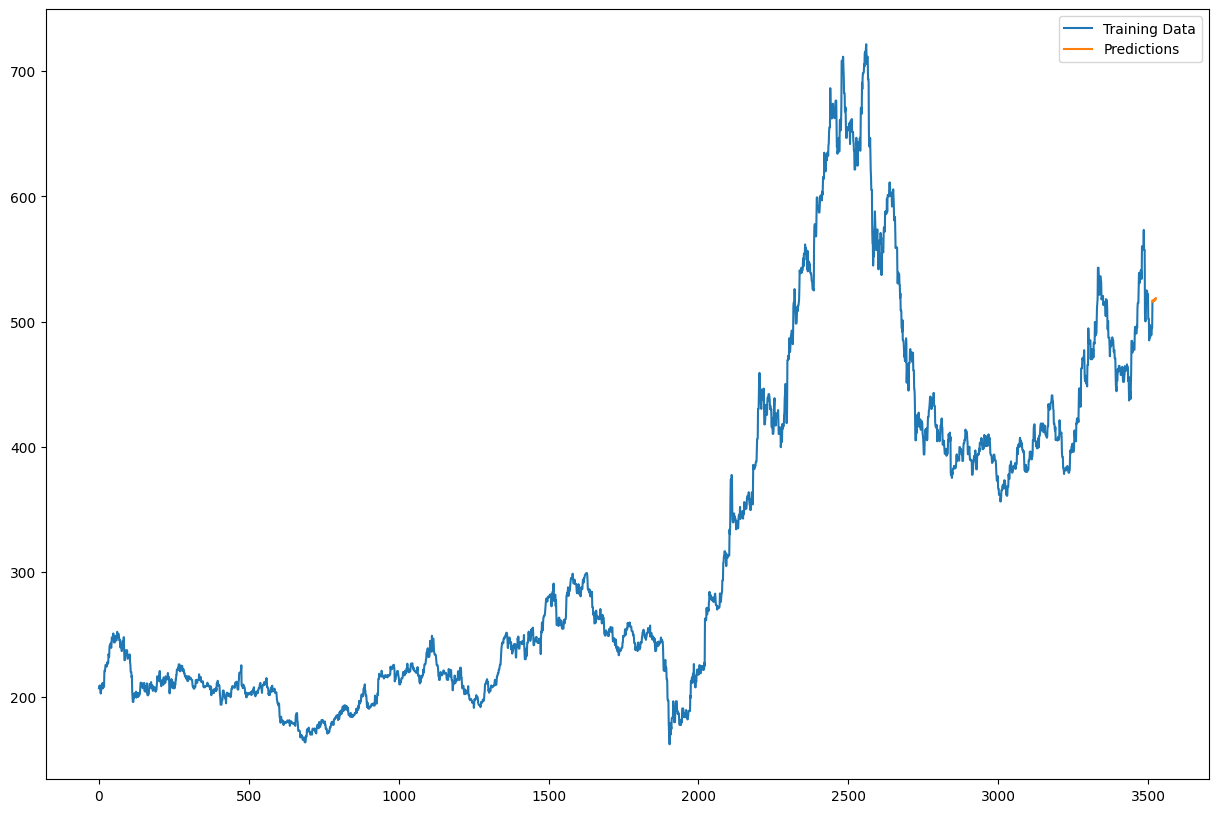

In [78]:
wipro_data["Price"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [79]:
#Conclusion:
    #*Predicted next 10 days prices using ARIMA(SARIMA) Model

In [80]:
#############LSTM#############################

In [81]:
#LSTM stands for Long-Short Term Memory. LSTM is a type of recurrent neural network but is better than traditional recurrent neural networks in terms of memory. Having a good hold over memorizing certain patterns LSTMs perform fairly better.

In [82]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [83]:
wipro_data1=wipro_data.reset_index()['Price']


In [84]:
wipro_data1.shape


(3516,)

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
wipro_data1=scaler.fit_transform(np.array(wipro_data1).reshape(-1,1))

In [86]:
print(wipro_data1)

[[0.0801217 ]
 [0.08340793]
 [0.08340793]
 ...
 [0.59518911]
 [0.59518911]
 [0.63292497]]


In [87]:
##splitting dataset into train and test split
training_size=int(len(wipro_data1)*0.65)
test_size=len(wipro_data1)-training_size
train_data,test_data=wipro_data1[0:training_size,:],wipro_data1[training_size:len(wipro_data1),:1]

In [88]:
training_size,test_size

(2285, 1231)

In [89]:
train_data

array([[0.0801217 ],
       [0.08340793],
       [0.08340793],
       ...,
       [0.45435034],
       [0.45435034],
       [0.45435034]])

In [90]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [91]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 300
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [92]:
print(X_train.shape), print(y_train.shape)

(1984, 300)
(1984,)


(None, None)

In [93]:
print(X_test.shape), print(ytest.shape)

(930, 300)
(930,)


(None, None)

In [94]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [95]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [96]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(300,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [97]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 300, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 300, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 26s 667ms/step - loss: 0.0090 - val_loss: 0.0025
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 533ms/step - loss: 4.5511e-04 - val_loss: 0.0013
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 546ms/step - loss: 3.3037e-04 - val_loss: 9.1682e-04
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 530ms/step - loss: 3.0212e-04 - val_loss: 0.0019
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 570ms/step - loss: 3.5076e-04 - val_loss: 8.7633e-04
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 561ms/step - loss: 2.7689e-04 - val_loss: 7.8575e-04
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 535ms/step - loss: 2.5206e-04 - val_loss: 7.0164e-04
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 532ms/step - loss: 2.6579e-04 - val_loss: 6.2416e-04
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 529ms/step - loss: 2.3095e-04 - val_loss: 6.0017e-04
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 526ms/step - loss: 2.4768e-04 - val_loss: 5.7490e-04
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 531ms/step 

In [99]:
import tensorflow as tf

In [100]:
tf.__version__

'2.17.0'

In [101]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step


In [102]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [103]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

246.7178209652462

In [104]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

455.7429855367289

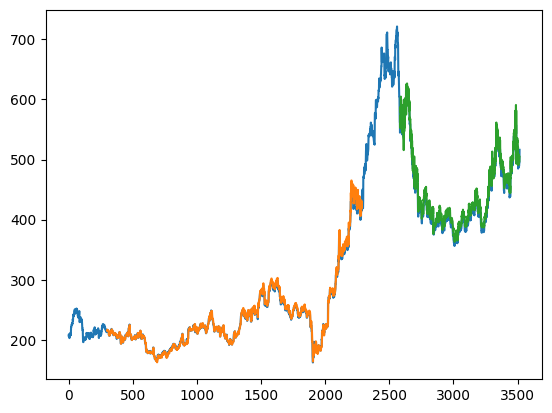

In [106]:
### Plotting
# shift train predictions for plotting
look_back=300
trainPredictPlot = numpy.empty_like(wipro_data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(wipro_data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(wipro_data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(wipro_data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [107]:
len(test_data)

1231

In [108]:
x_input=test_data[703:].reshape(1,-1)
x_input.shape

(1, 528)

In [109]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [110]:
temp_input

[0.4117857507168752,
 0.4073146785049656,
 0.4055262496202018,
 0.4055262496202018,
 0.4055262496202018,
 0.3989984951065174,
 0.38826792179793435,
 0.3816507130929008,
 0.37646428024278933,
 0.3829920347564737,
 0.3829920347564737,
 0.3829920347564737,
 0.3662702137682281,
 0.3649288921046552,
 0.3649288921046552,
 0.35616560148501597,
 0.356612708706207,
 0.356612708706207,
 0.356612708706207,
 0.35571849426382507,
 0.3466869502271749,
 0.35178392888593735,
 0.35178392888593735,
 0.3628722098028804,
 0.3628722098028804,
 0.3628722098028804,
 0.3677009896231501,
 0.3677009896231501,
 0.3709201397843177,
 0.3653759993258462,
 0.3653759993258462,
 0.3653759993258462,
 0.3653759993258462,
 0.37726904049382204,
 0.3718143542266996,
 0.37521235819204735,
 0.3683268960700029,
 0.3683268960700029,
 0.3683268960700029,
 0.3683268960700029,
 0.3558973480680051,
 0.3676115354318009,
 0.354913679434274,
 0.35857999139515084,
 0.3678797888488119,
 0.3678797888488119,
 0.3678797888488119,
 0.38558

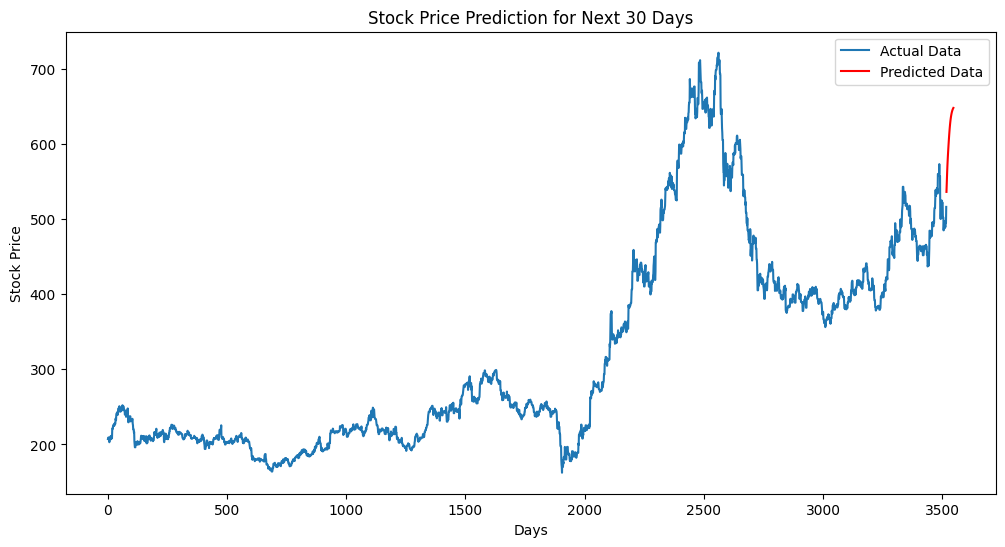

In [126]:
import numpy as np

lst_output = []
n_steps = 300
i = 0

# Ensure temp_input is initialized with the correct last 300 data points from your training data
temp_input = list(wipro_data1[-n_steps:].flatten())  # Flatten if required

while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])  # Take the last n_steps elements
        x_input = x_input.reshape((1, n_steps, 1))
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[-n_steps:]  # Maintain the last n_steps elements

    lst_output.extend(yhat.tolist())
    i += 1

# Convert lst_output to a numpy array and reshape it appropriately
lst_output = np.array(lst_output).reshape(30, 1)

# Creating the time ranges for plotting
day_new = np.arange(1, len(wipro_data1) + 1)
day_pred = np.arange(len(wipro_data1) + 1, len(wipro_data1) + 31)

# Plotting the actual vs predicted data
plt.figure(figsize=(12, 6))
plt.plot(day_new, scaler.inverse_transform(wipro_data1), label='Actual Data')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted Data', color='red')
plt.title('Stock Price Prediction for Next 30 Days')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


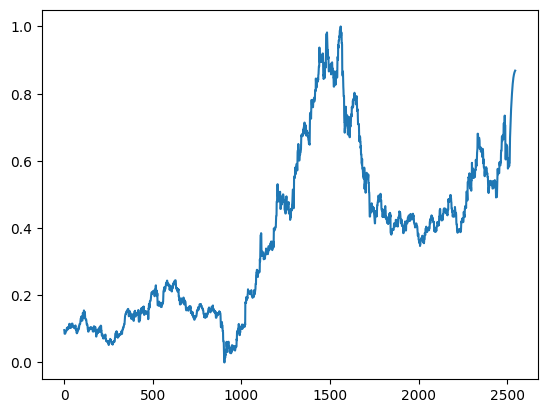

In [130]:
df3=wipro_data1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [131]:
df3=scaler.inverse_transform(wipro_data1).tolist()

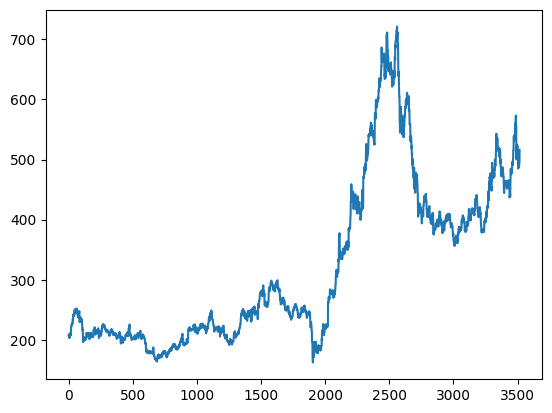

In [132]:
plt.plot(df3)

In [123]:
###Conclusion
    #* Predicted prices for next 30 days using LSTM model

In [124]:
                                        #Conclusion
    #*From LSTM and ARIMA models ARIMA model provided good accuracy, So finalizing ARIMA model for forecasting sbin stocks
